In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red"> ch12. 데이터시각화 </font></b>

- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)
- matplolib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplolib기반으로 다양한 색, 테마, 차트 기능. groupby 기능을 추가한 라이브러리

# 1절. matplolib

- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/pyplot_summary.html

## 1.1 패키지 import 및 기본 설정

In [2]:
import matplotlib
matplotlib.__version__

'3.7.0'

### 그래프 기본설정

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

# 이미지 해상도 올라감
%config InlineBackend.figure_format = 'retina' 

# 한글설정(windows)
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# plt.rc('font',family='AppleGothic')

# 한글설정 2 : 특정폰트
from matplotlib.font_manager import FontProperties
font_file = 'C:/Windows/Fonts/HMKMRHD.TTF' # 네이버폰트, 구글폰트다운
font_prop = FontProperties(fname=font_file, size=15)

# warning 안보이게 
import warnings
warnings.filterwarnings(action='ignore')

## 1.2 그래프 그리기

- matplolib으로 그래프 그리기 위한 단계
    1) 데이터 준비 <br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장 <br>

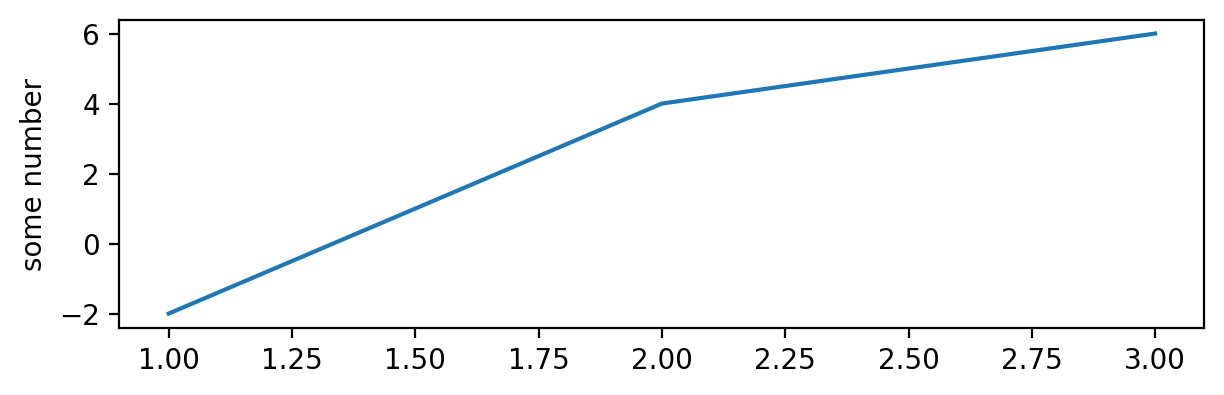

In [6]:
# 1) 데이터 준비하기
x = [1,2,3] 
y = [-2,4,6]


# 2) 그래프 객체 생성. 사이즈는 인치
plt.figure(figsize=(7,2))

# 3) 그래프를 그림
plt.plot(x,y)

# 4) 커스터마이징
plt.ylabel('some number')

# 5) 출력
#plt.show()

# 6) 파일출력
plt.savefig('data/ch12.png', bbox_inches='tight')

## 1.3 그래프 영역 나누기

### 1) subplot()함수로 서브플롯 추가

In [10]:
import numpy as np
# x = np.linspace(0, 9.9, 100) # 0부터 9.9까지 100개 만들어
x = np.arange(0,10,0.1) # 0부터 10까지 0.1씩 증가해
x.shape

(100,)

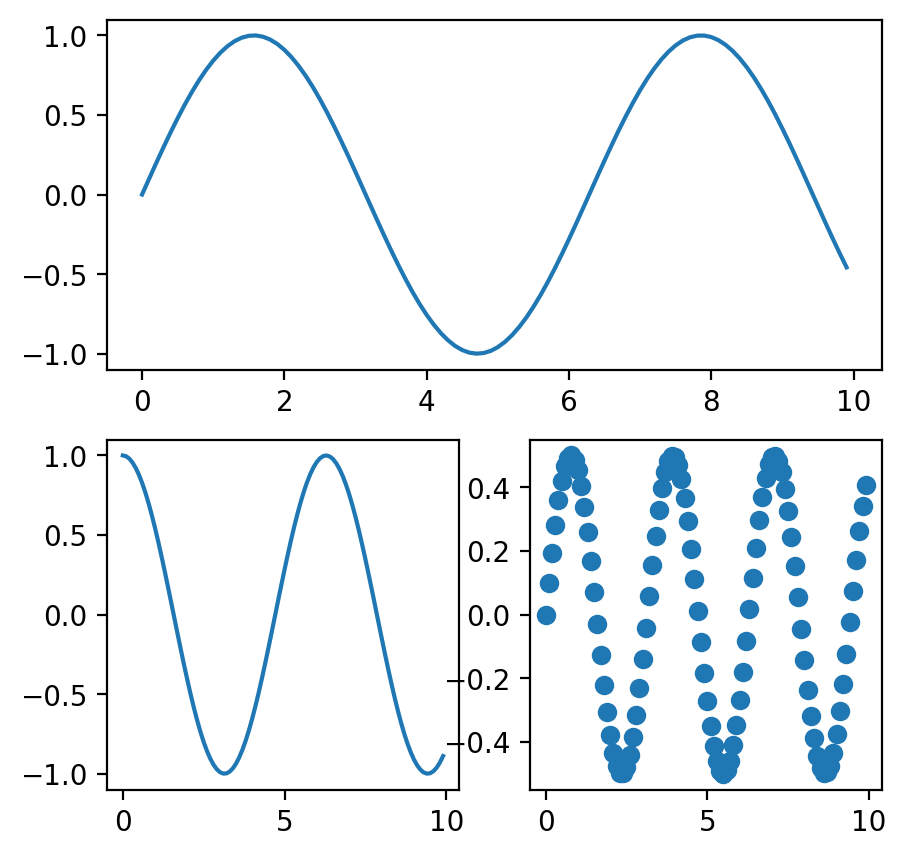

In [13]:
plt.figure(figsize=(5,5))
plt.subplot(2,1,1) # 그래프를 2행 1열로 subplot에서 1번째 subplot은 다음과 같이 그린다
plt.plot(x, np.sin(x))
plt.subplot(2,2,3) # 2행 2열 subplot중 3번째 subplot
plt.plot(x, np.cos(x))
plt.subplot(224) # 2행 2열 subplot중 4번째 subplot
plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

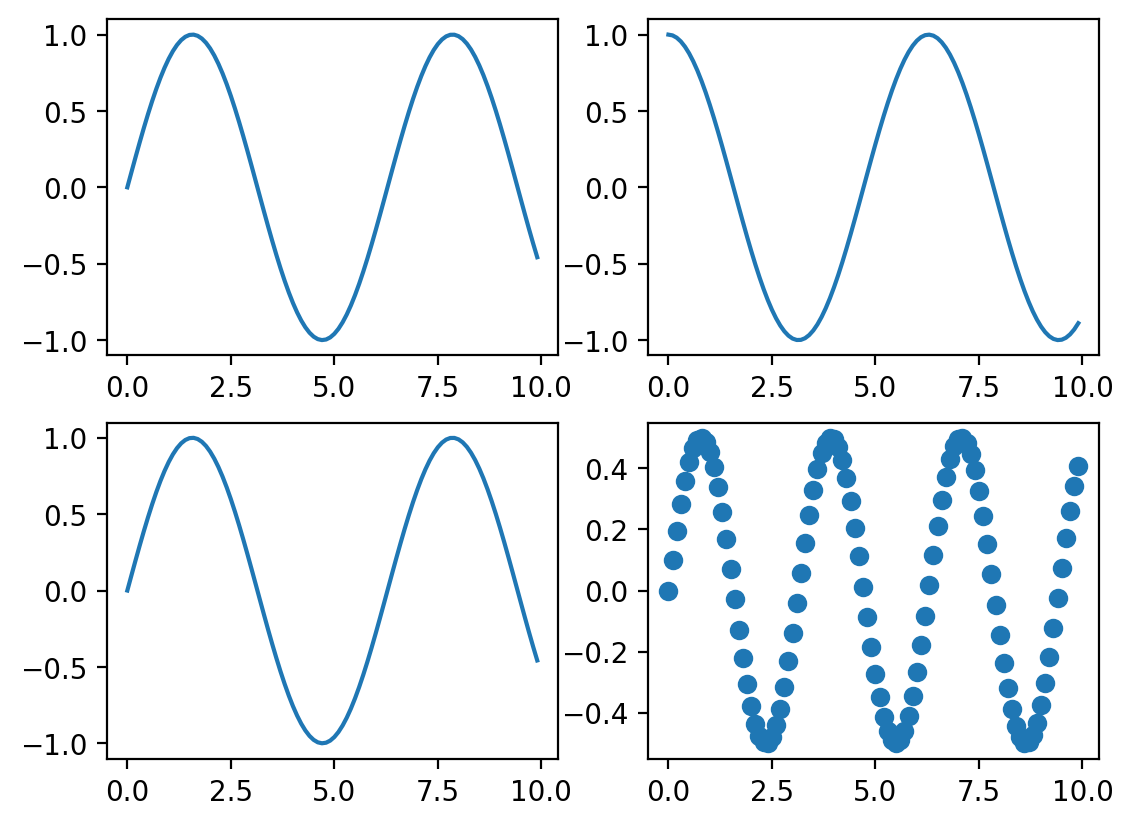

In [15]:
# 2행 2열짜리 subplot

plt.subplot(2,2,1) ; plt.plot(x, np.sin(x))
plt.subplot(2,2,2) ; plt.plot(x, np.cos(x))
plt.subplot(2,2,3) ; plt.plot(x, np.sin(x))
plt.subplot(2,2,4) ; plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

### 2) subplots()함수로 서브플롯 추가

- plot 함수에 색상이나 스타일 조정(교안 14page) https://wikidocs.net/92085

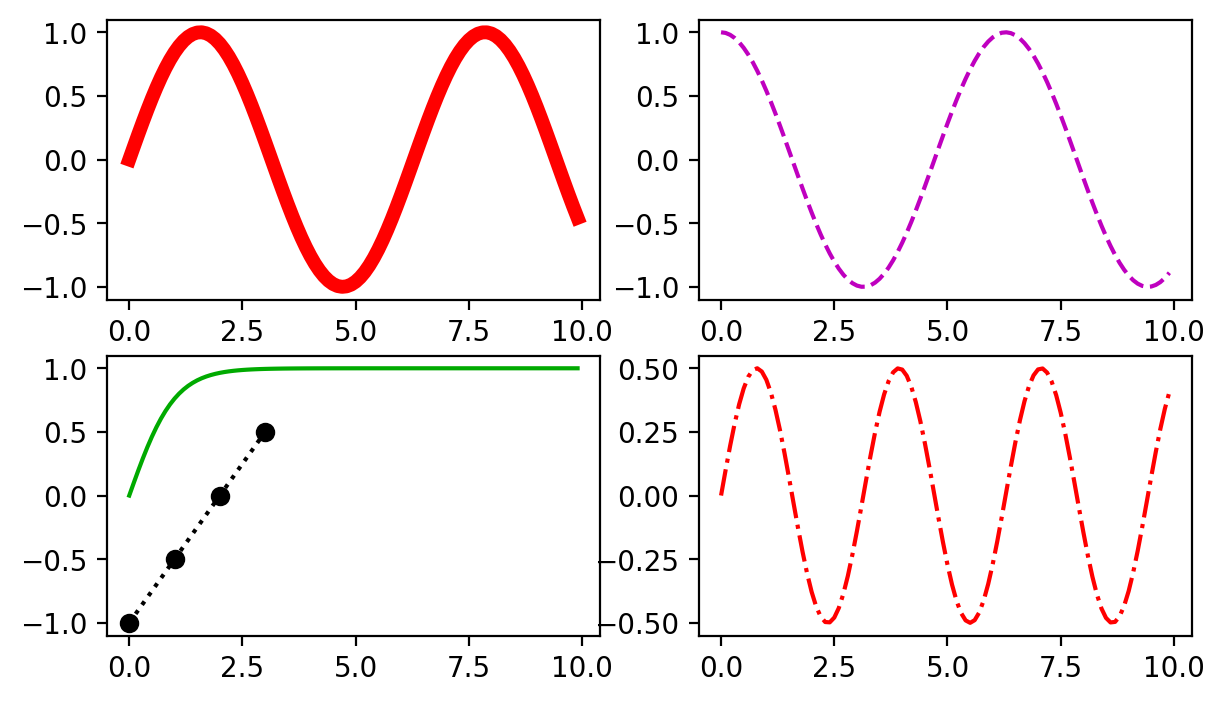

In [33]:
# 2행 2열 서브플롯

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4)) # fig는 안쓰는 변수
axes[0,0].plot(x, np.sin(x), c='r', linewidth=5)
axes[0,1].plot(x, np.cos(x), 'm--') #c='c', linestyle='--' 합칠수도있음
axes[1,0].plot(x, np.tanh(x), '#00AA00')
axes[1,0].plot([0,1,2,3],[-1,-0.5,0,0.5], 'ko:') # k:black, marker'o',linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')
plt.show()

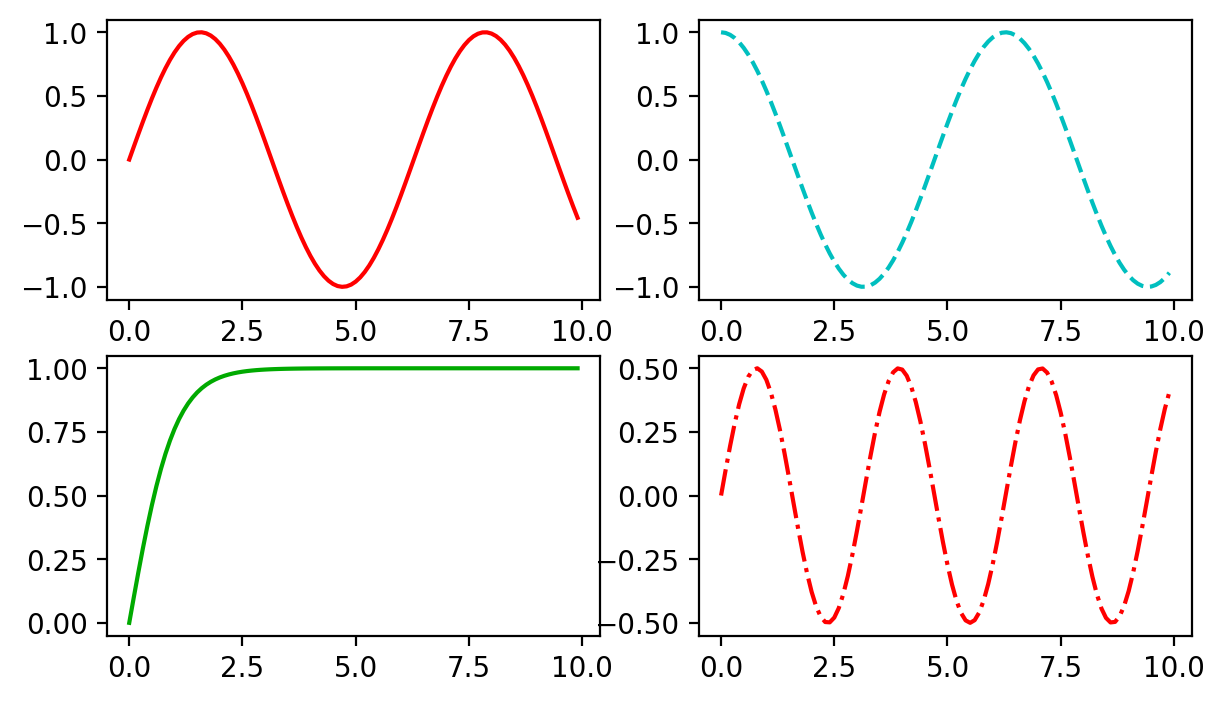

In [39]:
# 2행 2열 서브플롯(for)

func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
fmt  = ['r', 'c--', '#00AA00', 'r-.']
fig, axes = plt.subplots(2,2, figsize=(7,4))

enumerate(axes.flat) # for문을 두번 돌리기 싫어서 2차원을 1차원으로 바꿈
for i, ax in enumerate(axes.flat):
    ax.plot(x, func[i](x), fmt[i])

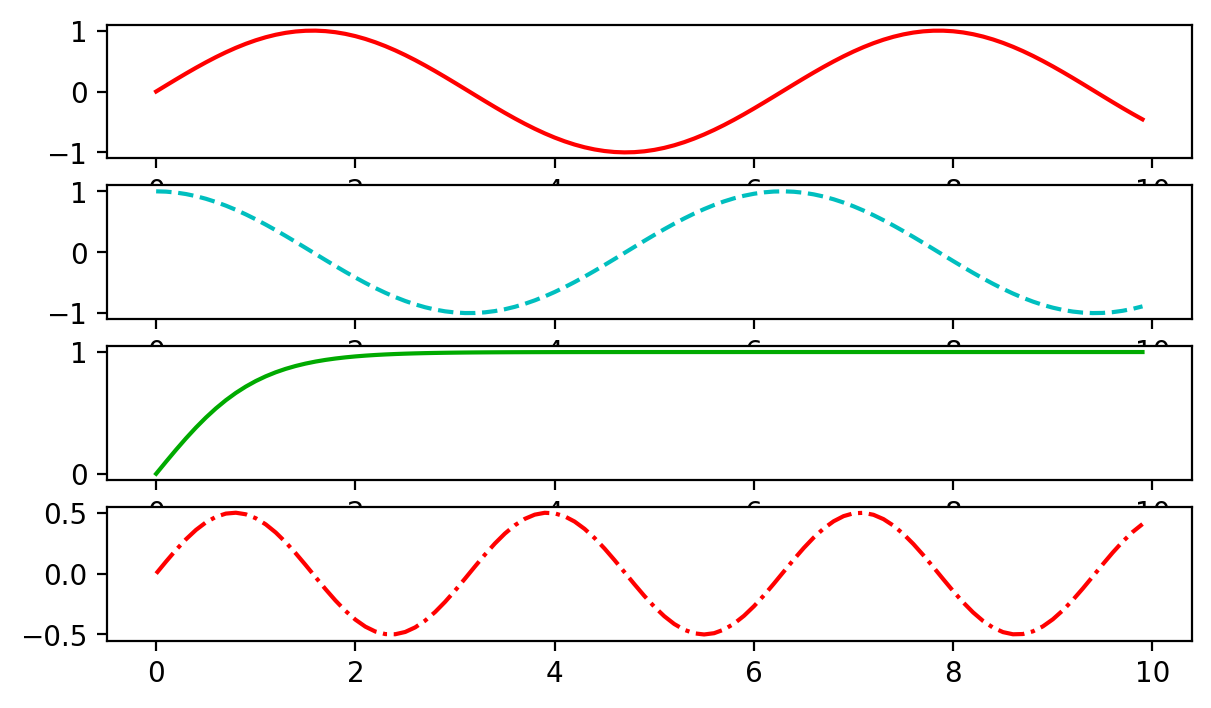

In [38]:
# 4행 1열 서브플롯(for)

func = [np.sin, np.cos, np.tanh, lambda x : np.sin(x)*np.cos(x)]
fmt = ['r','c--', '#00AA00', 'r-.']
fig, axes = plt.subplots(4,1, figsize=(7,4))

for i, ax in enumerate(axes):
    ax.plot(x, func[i](x), fmt[i])

## 1.4 다양한 그래프 그리기

### 1) pyplot 함수들(교안 16page) : https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.html

### 2) matplotlib.pyplot.plot() : 선그래프

### 3) pandas.DataFrame.plot() 

- plt.____(x, y, fmt)
- df.plot(x=None, y=None, kind='line', figsize=None, title=None, grid=None)
    * kind : line(기본값), scatter(점도표), bar(막대그래프), barh(가로막대그래프), density(밀도), hist(히스토그램), pie(한컬럼만)...

In [5]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


#### 범례사용
- 교안(20page) 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

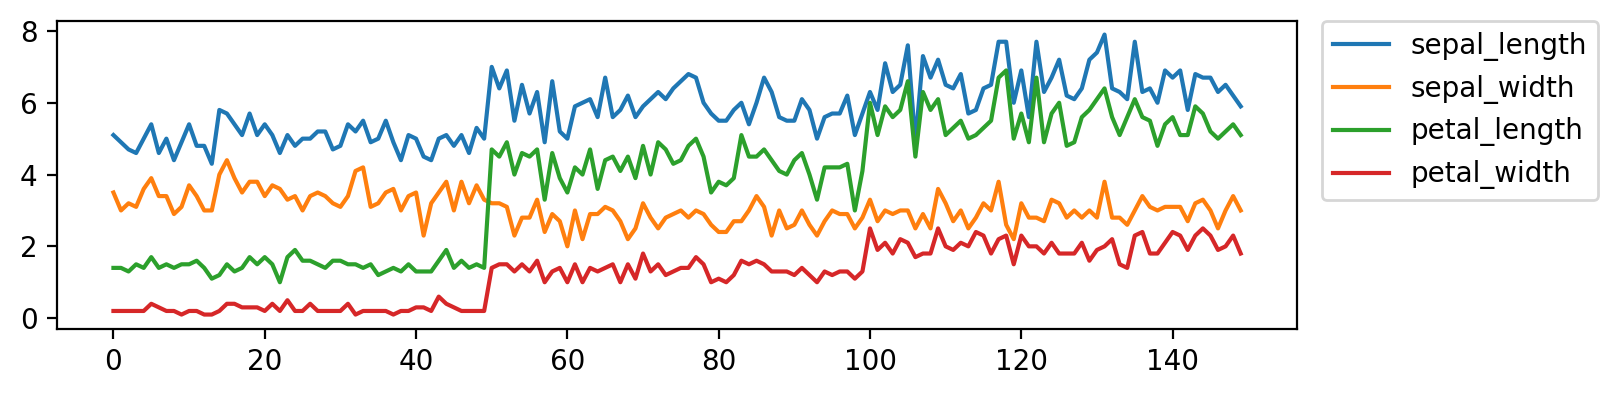

In [14]:
# plt.figure(figsize=(8,2)) 
# plt.plot(iris.index, iris.iloc[:,:-1]) 이렇게 안씀. 아래처럼 쓴다.

# ax = iris.plot(kind='line', figsize=(8,2))
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

iris.plot(kind='line', figsize=(8,2))
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

#### colormap
- 교안(21page) colormap : https://matplotlib.org/stable/users/explain/colors/colormaps.html
- 단색 : https://wikidocs.net/92085

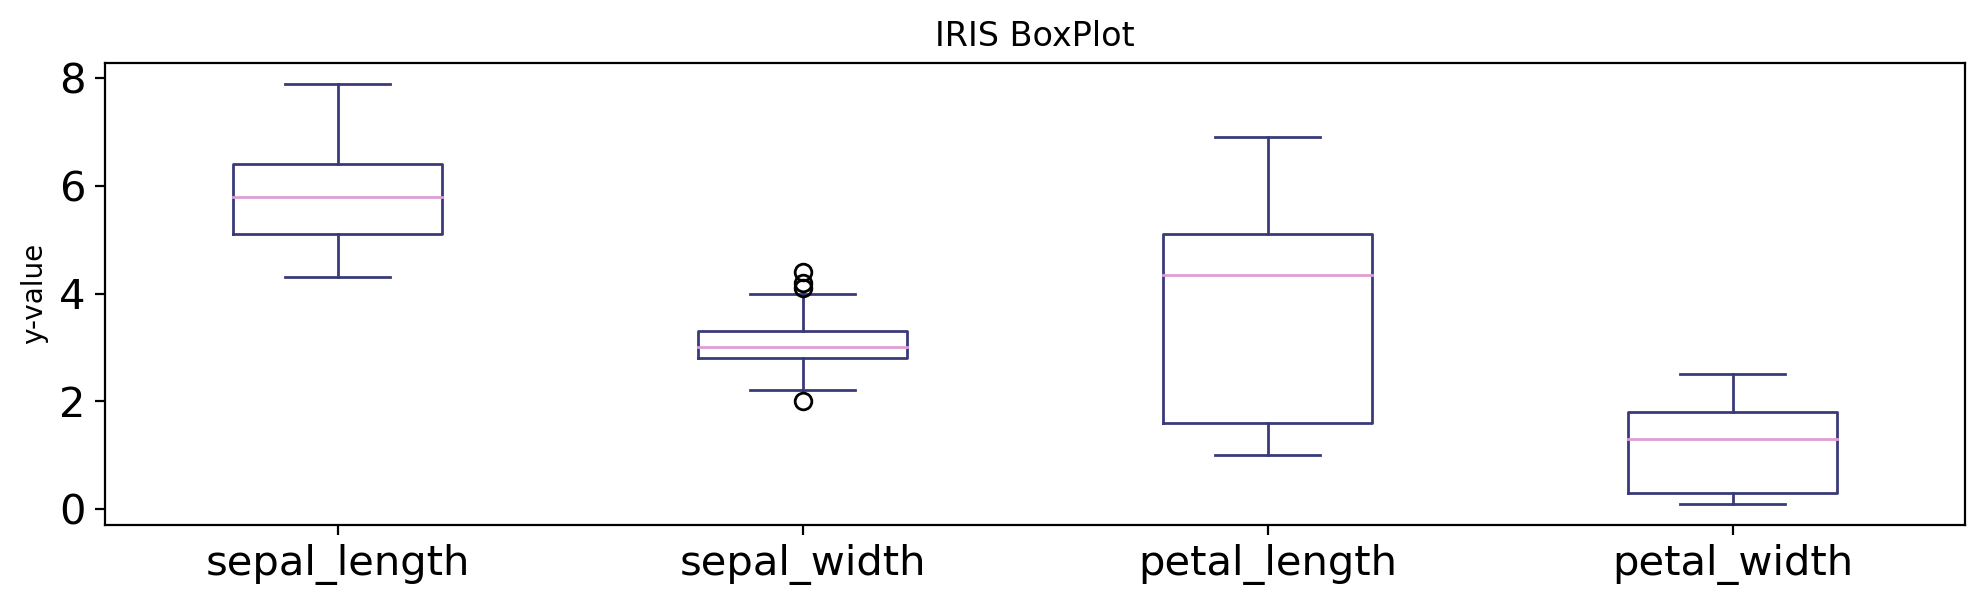

In [21]:
iris.plot(kind='box', figsize=(12,3), title='IRIS BoxPlot', ylabel='y-value', fontsize=15, colormap='tab20b')
plt.show()

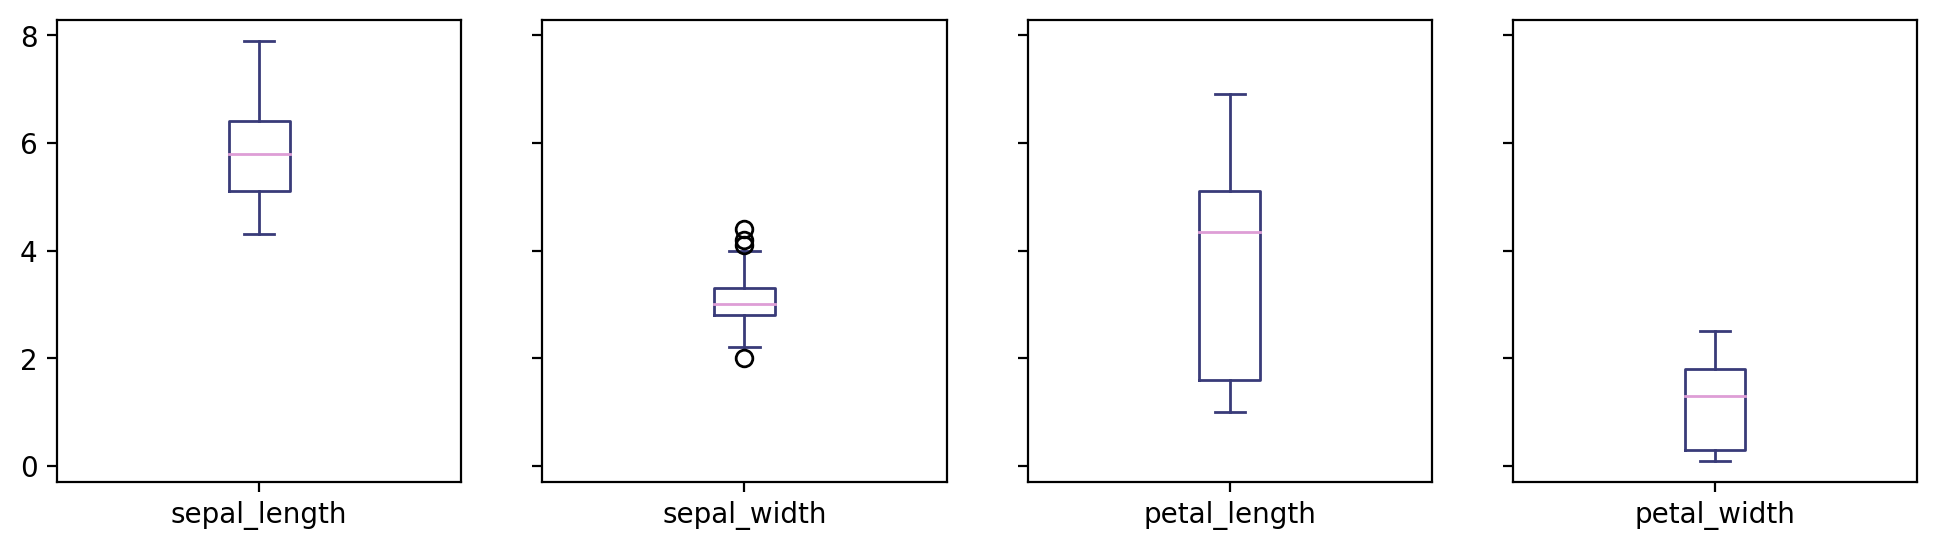

In [24]:
# 위와 달리 y축이 다 달라서 비교가 어려우니 sharey=True를 넣어서 한눈에 보이게 바꿈

iris.plot(kind='box', figsize=(12,3), subplots=True, colormap='tab20b', sharey=True)
plt.show()

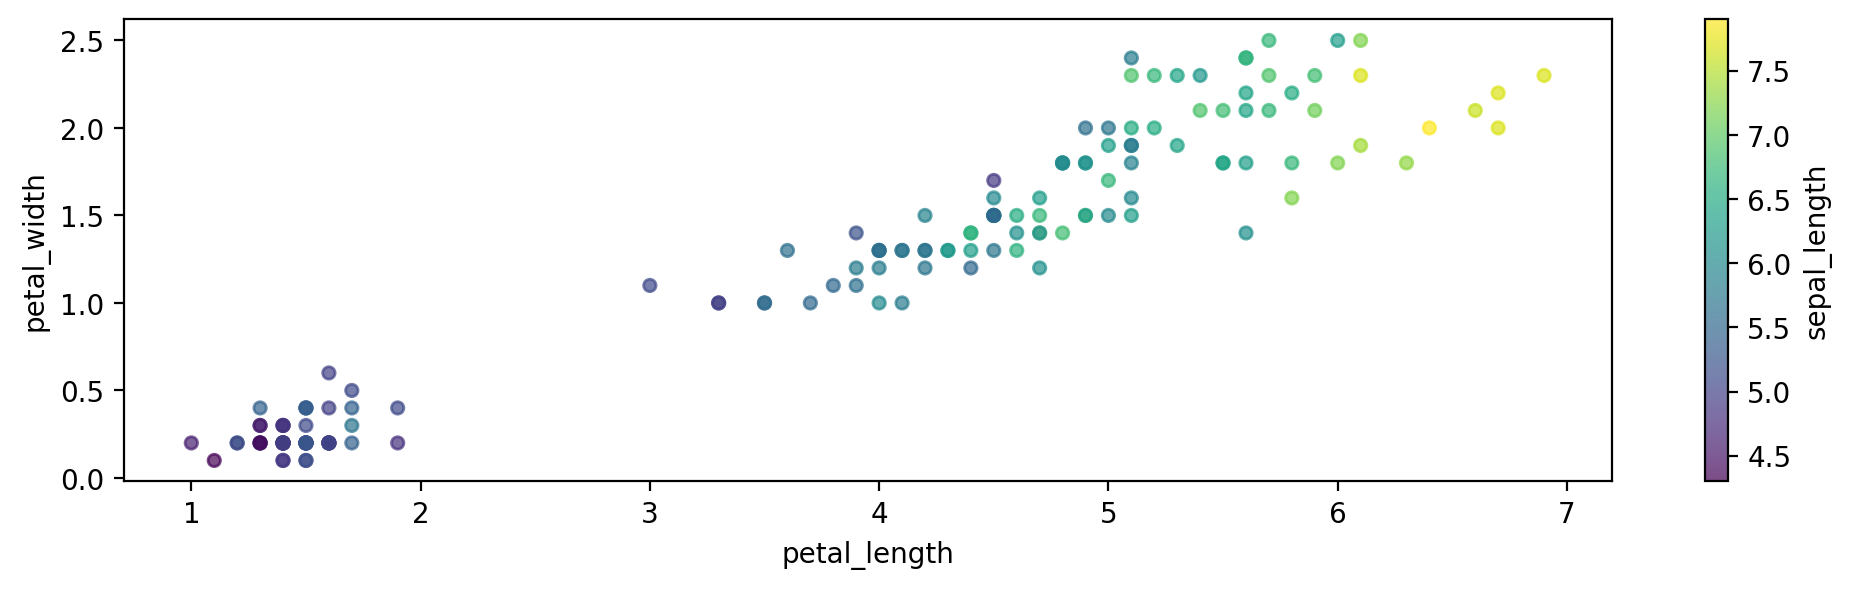

In [27]:
# scatter는 x,y를 넣어줘야함

iris.plot(kind='scatter', x='petal_length', y='petal_width', figsize=(12,3), c='sepal_length', alpha=0.7) # c=칼라값, alpha=투명도
plt.show()

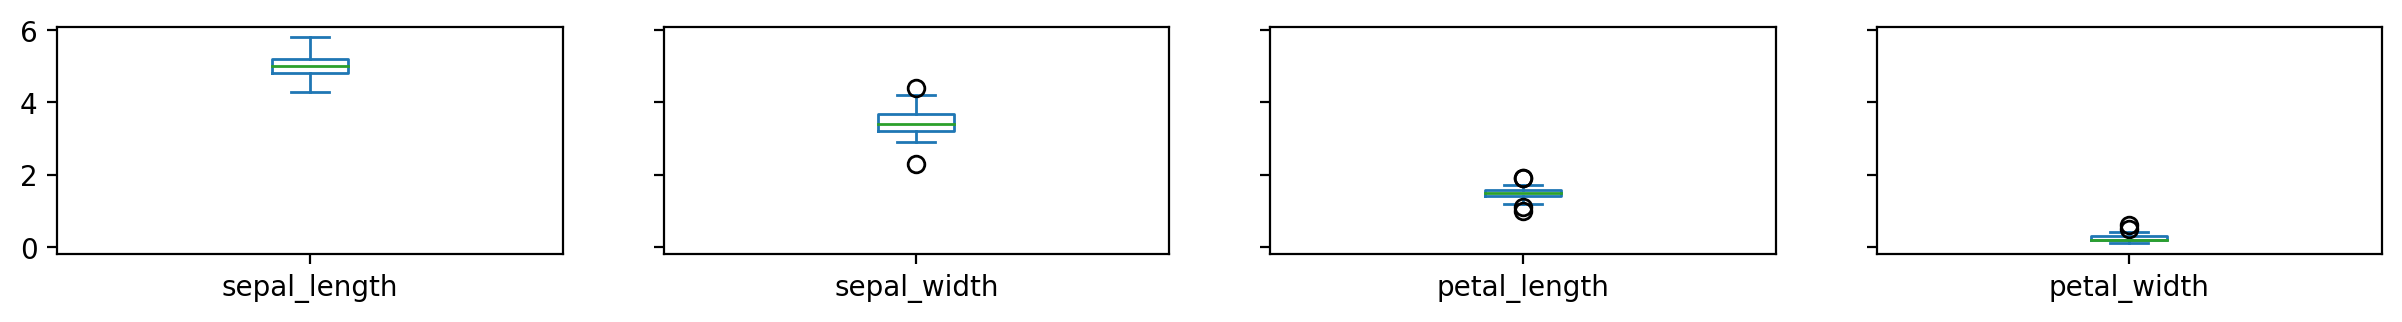

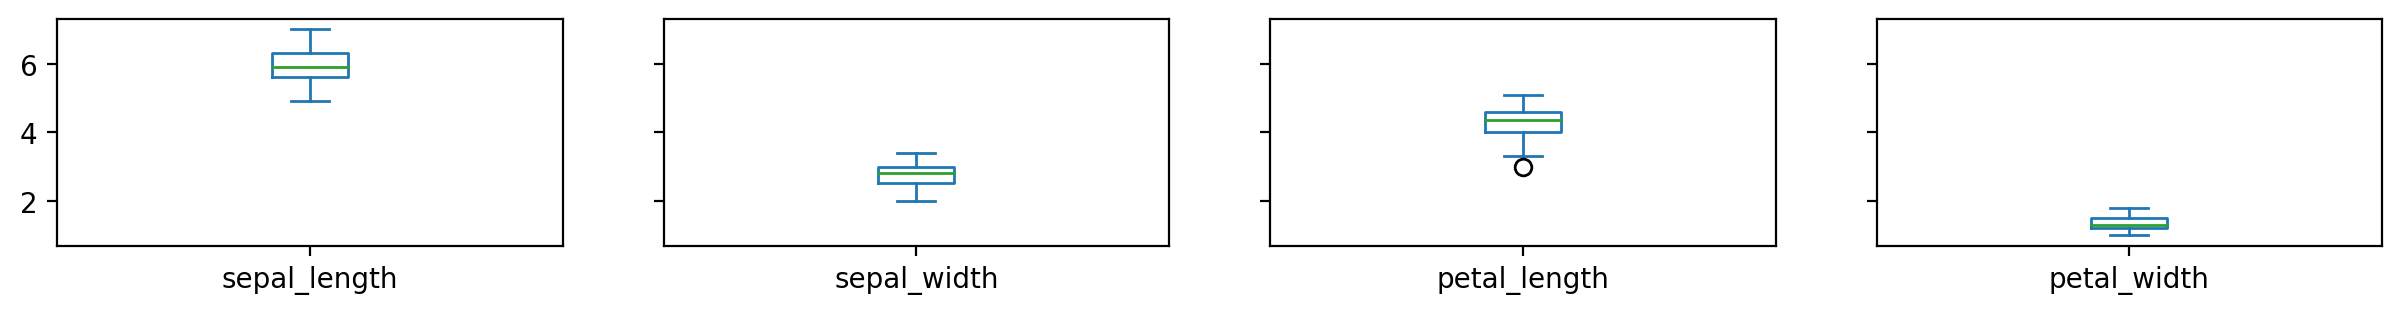

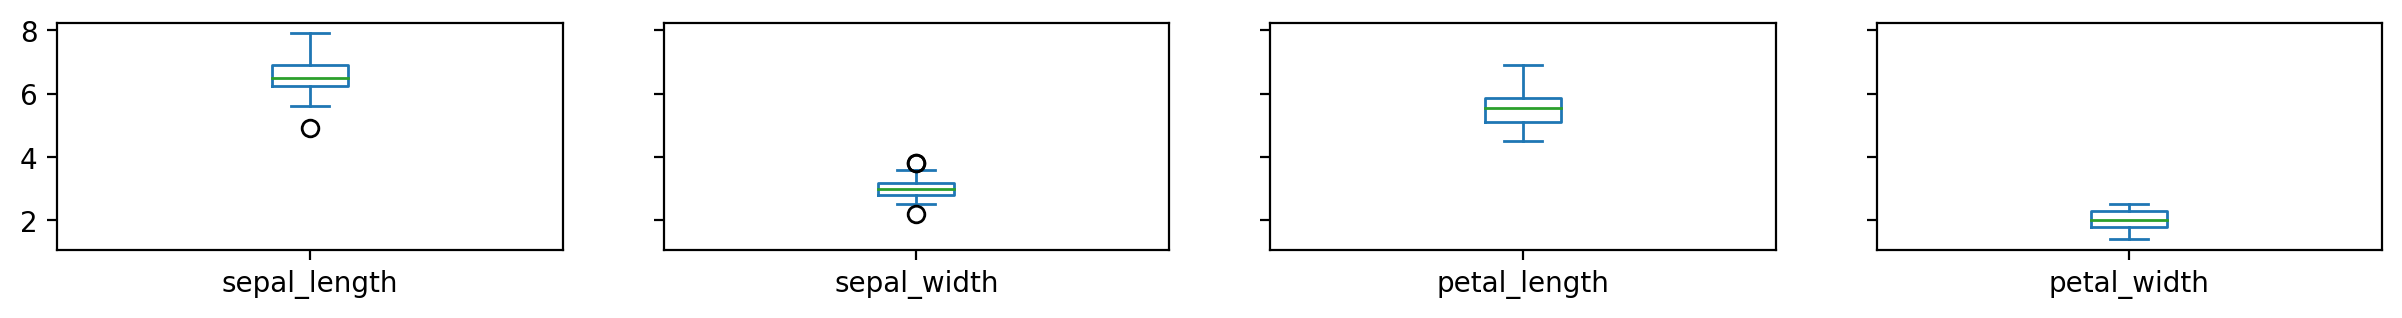

In [32]:
# 종별 boxplot

iris.groupby('species').plot(kind='box', figsize=(15,5), subplots=True, layout=(3,4), sharey=True) # layout=3행4열짜리 서브플롯을 만들어라
plt.show()

### 4) plt.scatter() : 산점도

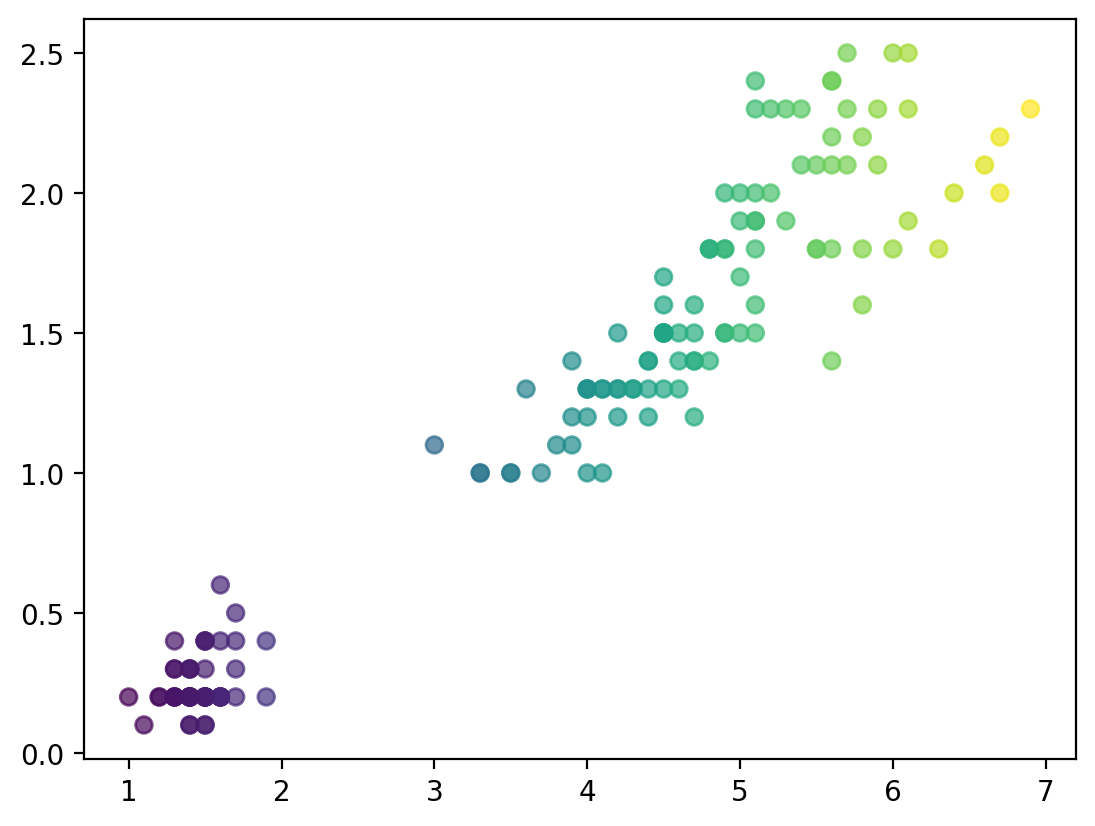

In [36]:
plt.scatter(iris.petal_length, iris.petal_width, c=iris.petal_length*20, alpha=0.7)
plt.show()

## 1.5 그 외 그래프 그리기

### 1) boxplot(분포를 모름)  vs  violinplt

- 동일한 통계, 다른 그래프(교안1page) : https://www.research.autodesk.com/publications/same-stats-different-graphs 

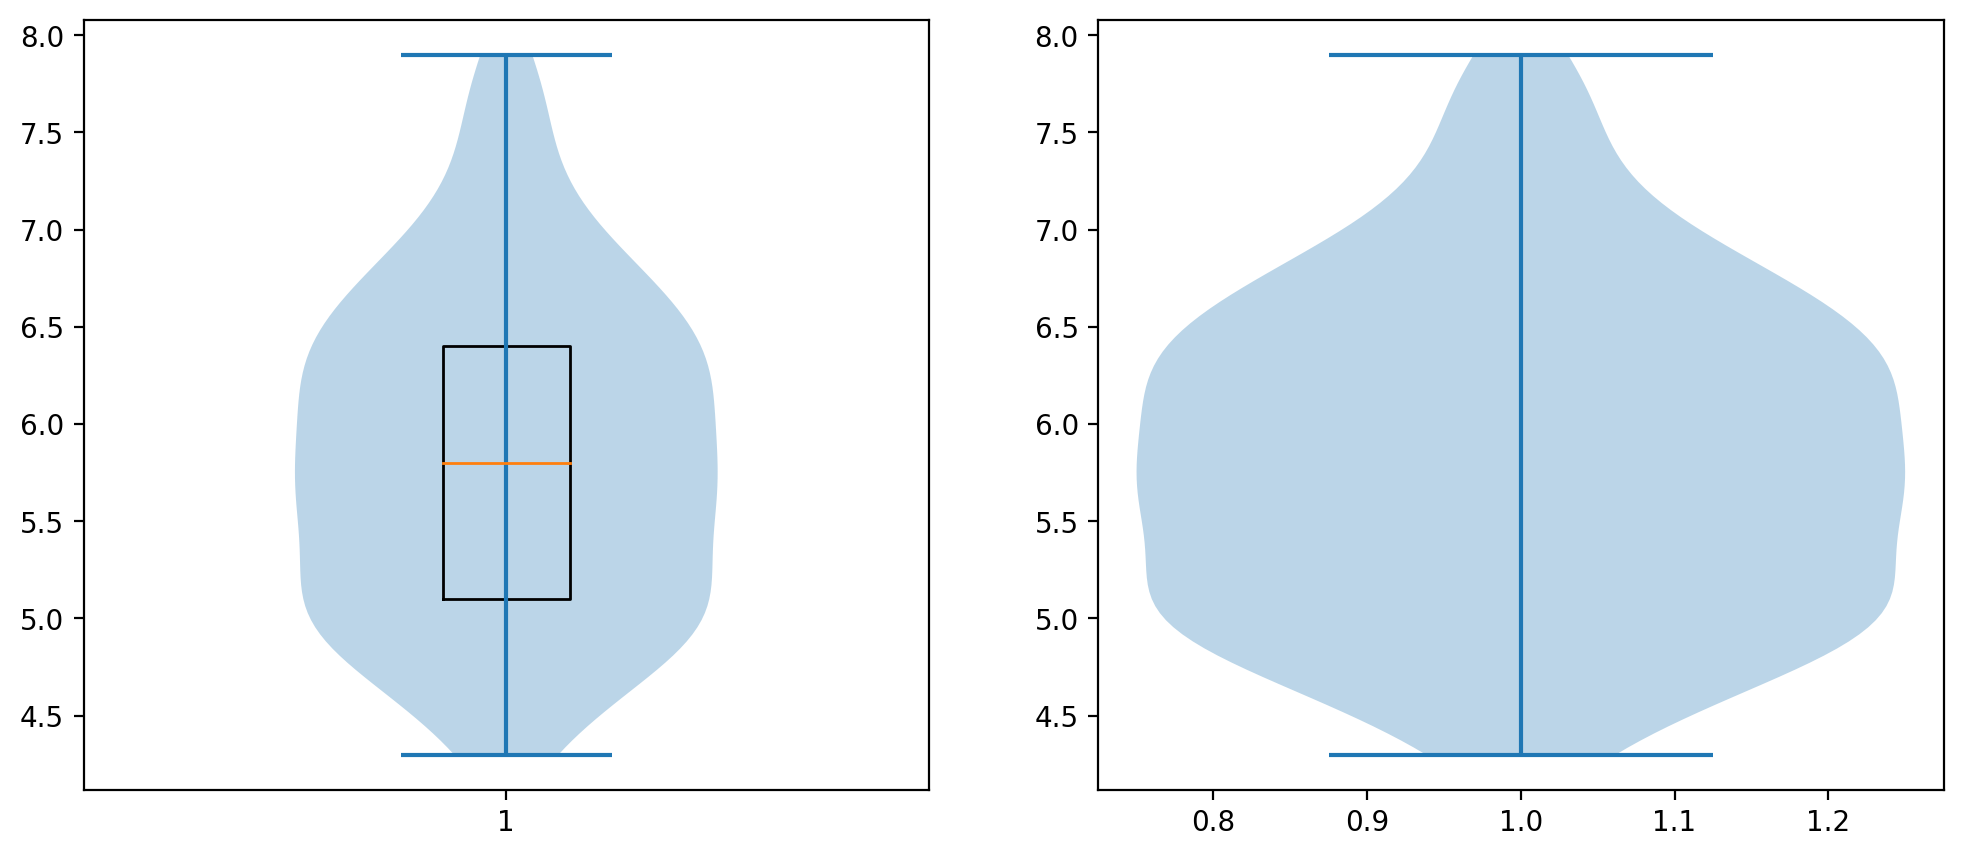

In [41]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))

axes[0].boxplot(iris.sepal_length)
axes[0].violinplot(iris.sepal_length)
axes[1].violinplot(iris.sepal_length)
plt.show()

### 2) bar(), barh()

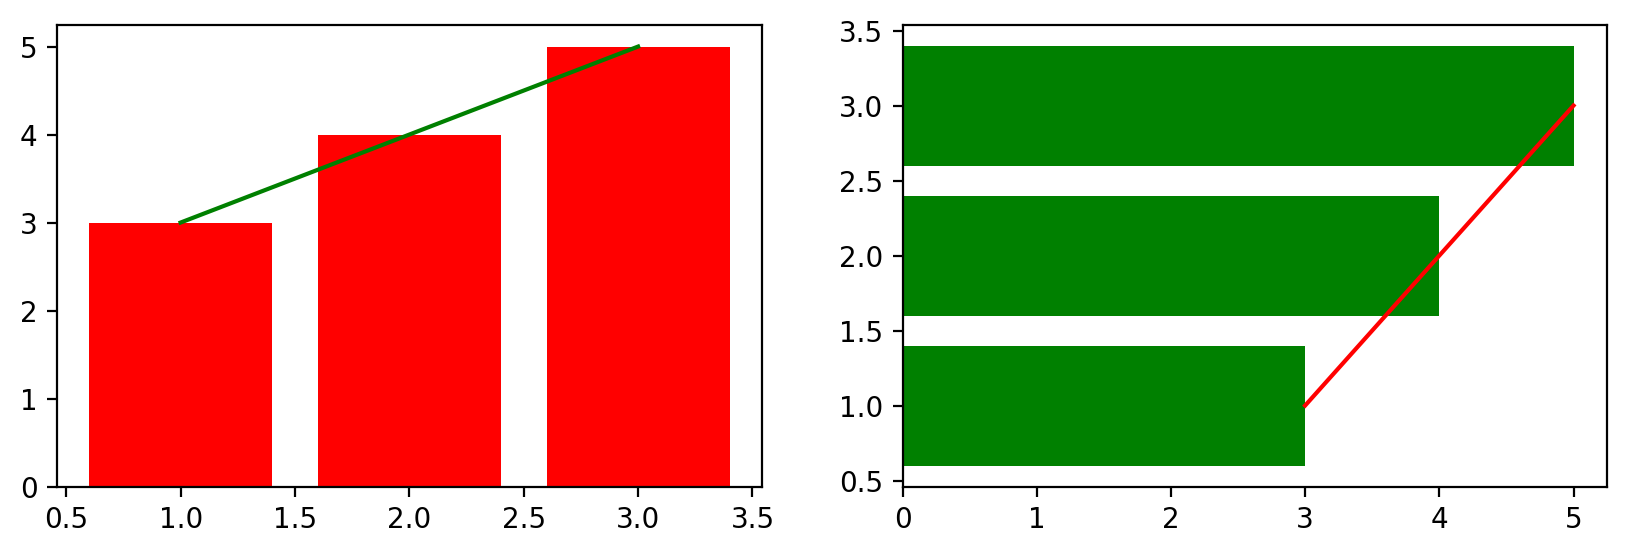

In [47]:
x = [1,2,3]
y = [3,4,5]
fig, axes = plt.subplots(ncols=2, figsize=(10,3))

axes[0].bar(x,y,color='r')
axes[0].plot(x,y,color='g')
axes[1].barh(x,y,color='g')
axes[1].plot(y,x,color='r') # barh의 x축은 y값이기 때문에 뒤집어서 써야함
plt.show()

### 3) hist(도수분포표, 히스토그램) 

- 1차원

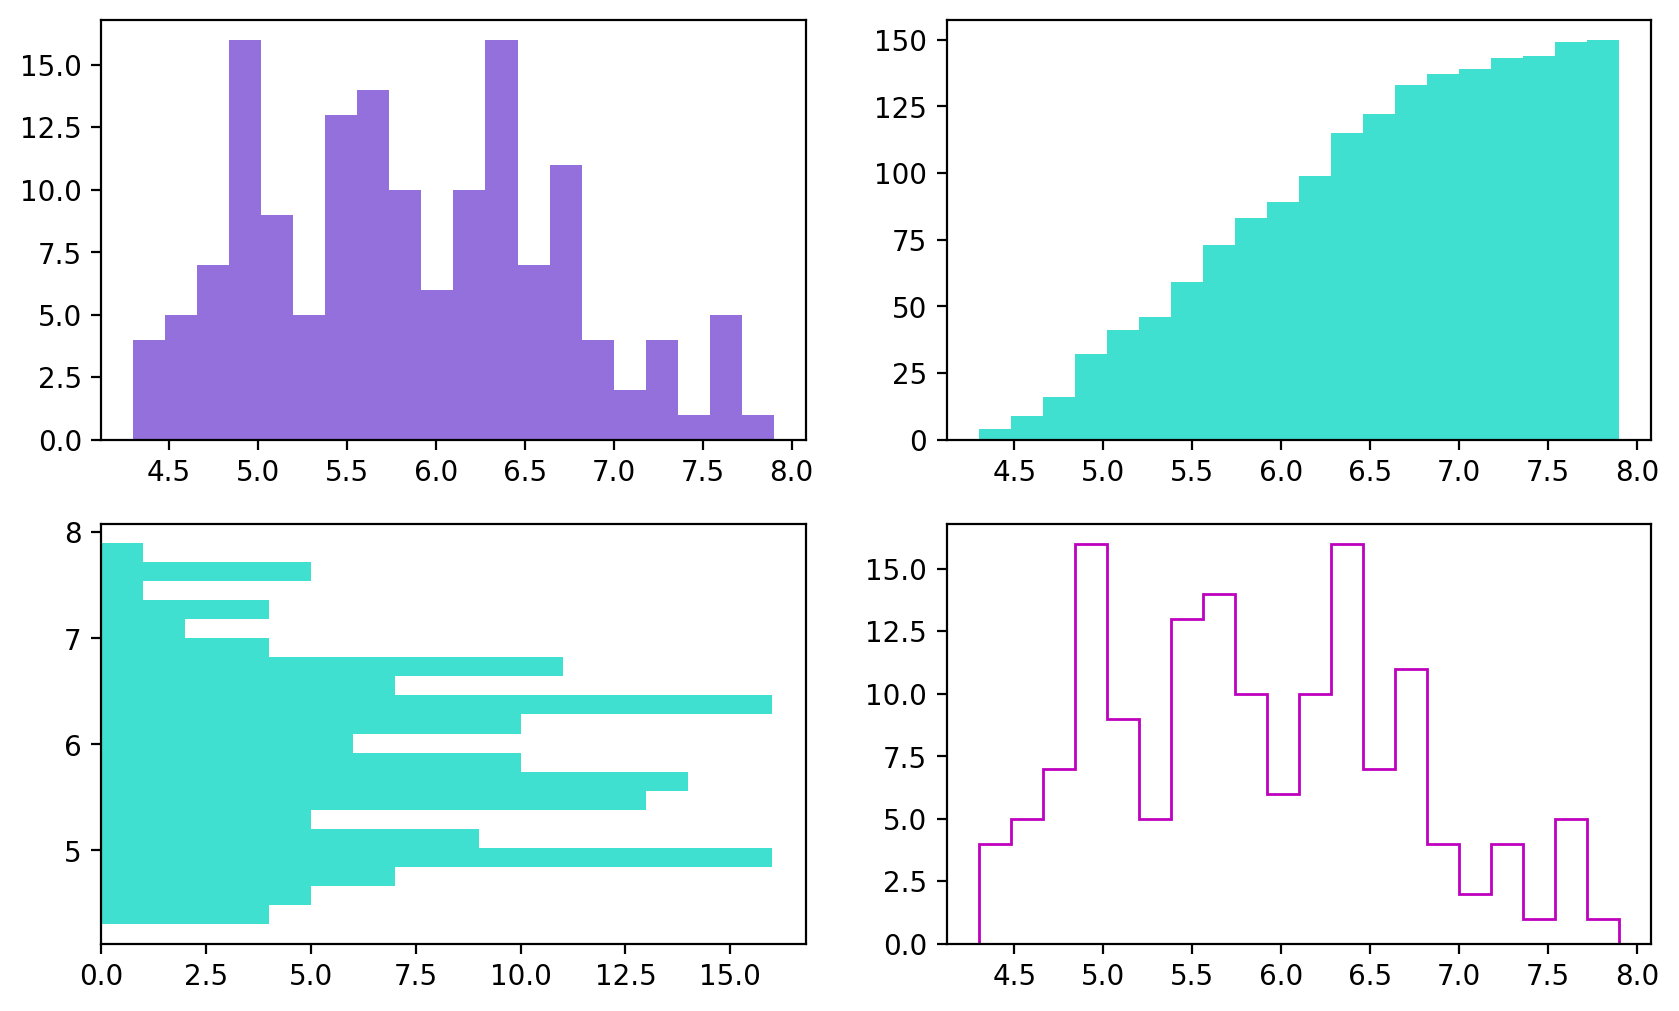

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='mediumpurple') # 히스토그램
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True, color='turquoise') # 누적 히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal', color='turquoise')
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step', color='m')
#plt.hist? # axes.hist()를 사용하면 shift tab tab이 안먹혀서 이렇게 해두고 볼 수 있다.
plt.show()

### 4) axvline(), axhline(), fill(), fill_between()

In [61]:
import numpy as np

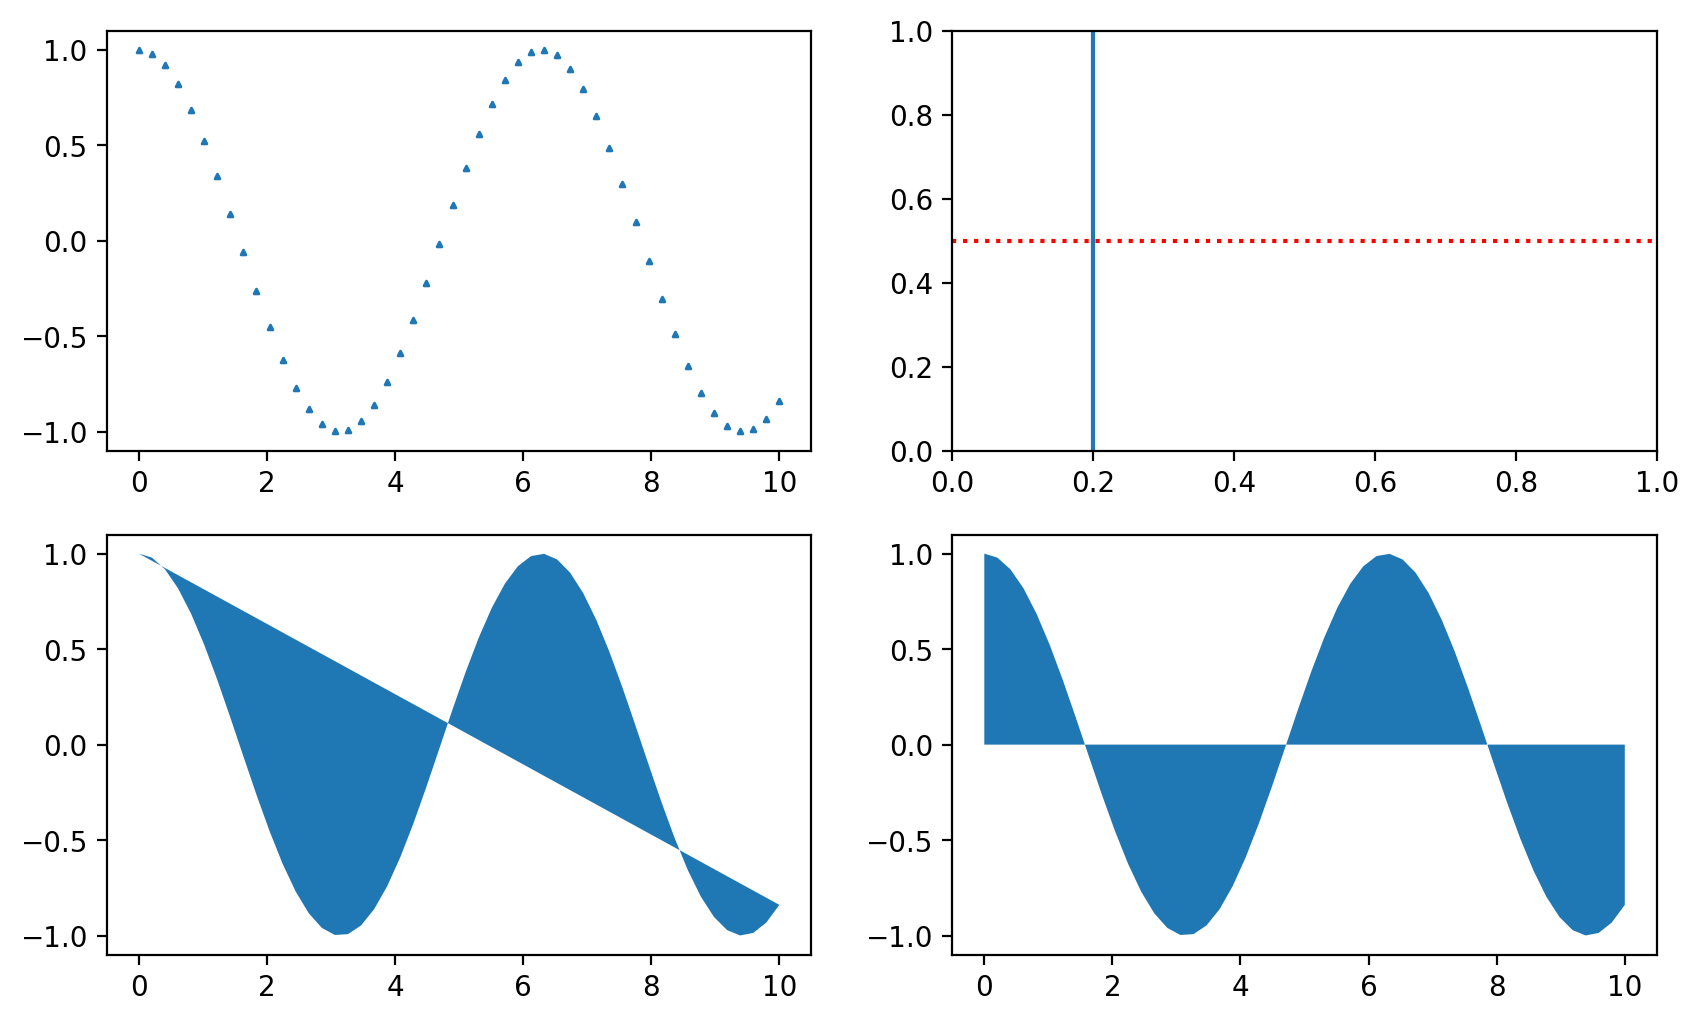

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
x = np.linspace(0,10) # 0~10까지 일정한 간격으로 50개(기본값)
y = np.cos(x)

axes[0,0].scatter(x,y, s=3, marker='^')
axes[0,1].axvline(0.2)
axes[0,1].axhline(0.5, color='r', linestyle=':')
axes[1,0].fill(x,y) # 별로 본적 없다고하심
axes[1,1].fill_between(x,y) # 별로 본적 없다고하심

### 5) pie

- 1차원

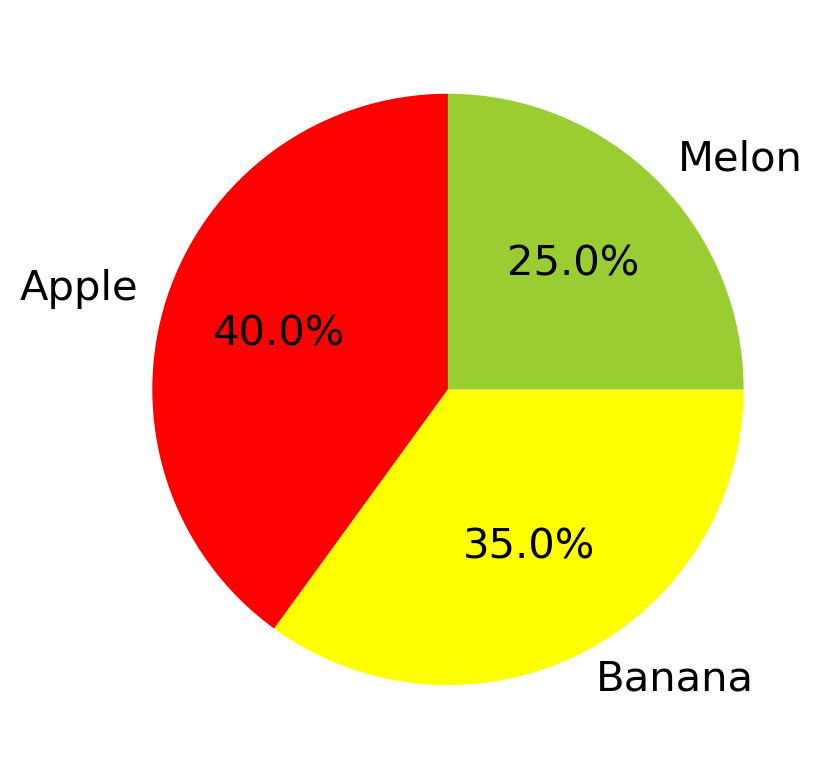

In [85]:
x = [40, 35, 25]
labels = ['Apple', 'Banana', 'Melon']
colors = ['red', 'yellow', 'yellowgreen']

plt.pie(x, labels=labels,
        autopct='%.1f%%', # %를 붙여주는것
        startangle=90, # 시작지점이 12시방향부터
        colors=colors, # 각 컬러 지정할 수 있음
        textprops={'fontsize':15}) # 폰트사이즈
plt.show()

## 1.6 그래프 커스터마이징

### 1) linestyle, linewidth, color, marker
### 2) text(), annotate()

- 참고 : https://matplotlib.org/stable/api/axes_api.html#text--andand--annotationsannotations

In [95]:
# 한글설정 1 : 기본폰트

# windows
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# mac
# plt.rc('font',family='AppleGothic')

In [102]:
# 한글설정 2 : 특정폰트

from matplotlib.font_manager import FontProperties
font_file = 'C:/Windows/Fonts/HMKMRHD.TTF' # 네이버폰트, 구글폰트다운
font_prop = FontProperties(fname=font_file, size=15)

In [93]:
# warnig 띄우기
warnings.filterwarnings(action='default')

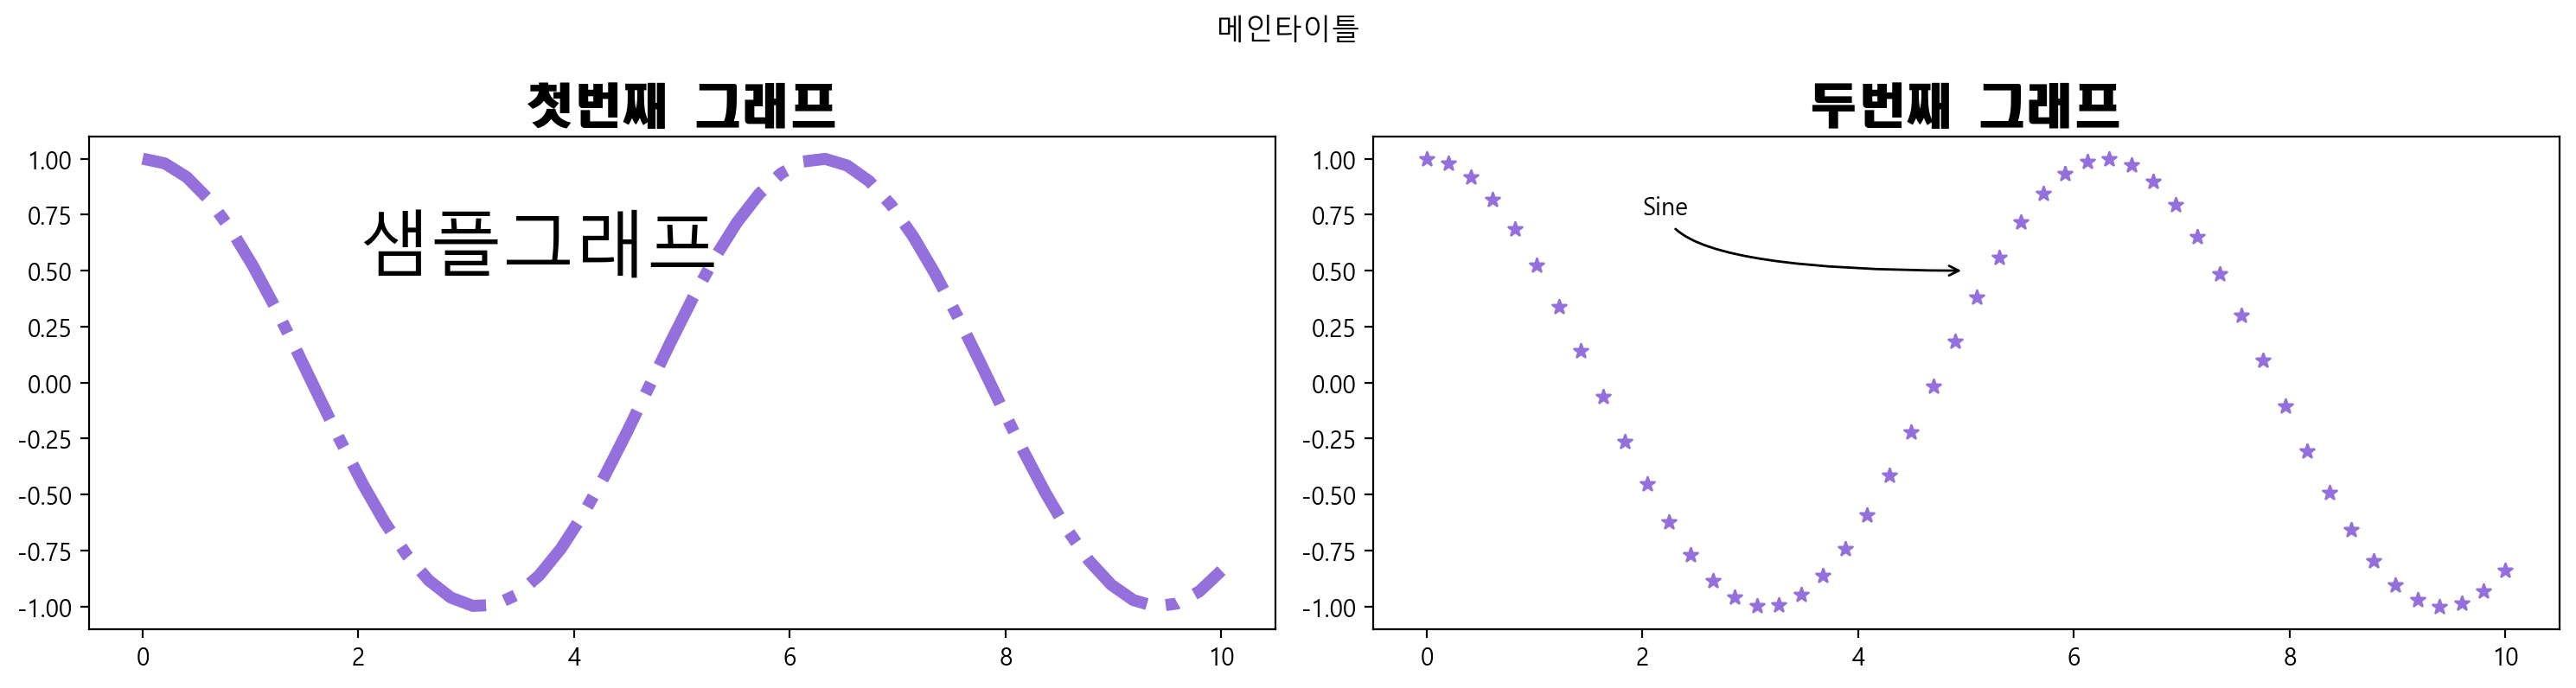

In [110]:
x = np.linspace(0,10) # num = 50
y = np.cos(x)
fig, axes = plt.subplots(ncols=2, figsize=(15,4))

axes[0].plot(x,y, linewidth=5, linestyle='-.', color='mediumpurple')
axes[0].text(2, 0.5, '샘플그래프', fontsize=30)
axes[0].set_title('첫번째 그래프', fontproperties=font_prop, fontsize=20)

axes[1].scatter(x,y, marker='*', color='mediumpurple')
axes[1].annotate('Sine', xytext=(2,0.75), # 글자와 글자가 있을 좌표
                xy=(5,0.5), # 화살표가 가리킬 좌표
                arrowprops=dict(arrowstyle='->',
                               connectionstyle='angle3')) # angle, angle3, arc
axes[1].set_title('두번째 그래프', fontproperties=font_prop, fontsize=20)

plt.suptitle('메인타이틀')
plt.tight_layout() # 서브플롯 레이아웃 조정
plt.show()

### 3) 수학기호

- 교안(30page) : https://matplotlib.org/2.0.2/users/mathtext.html

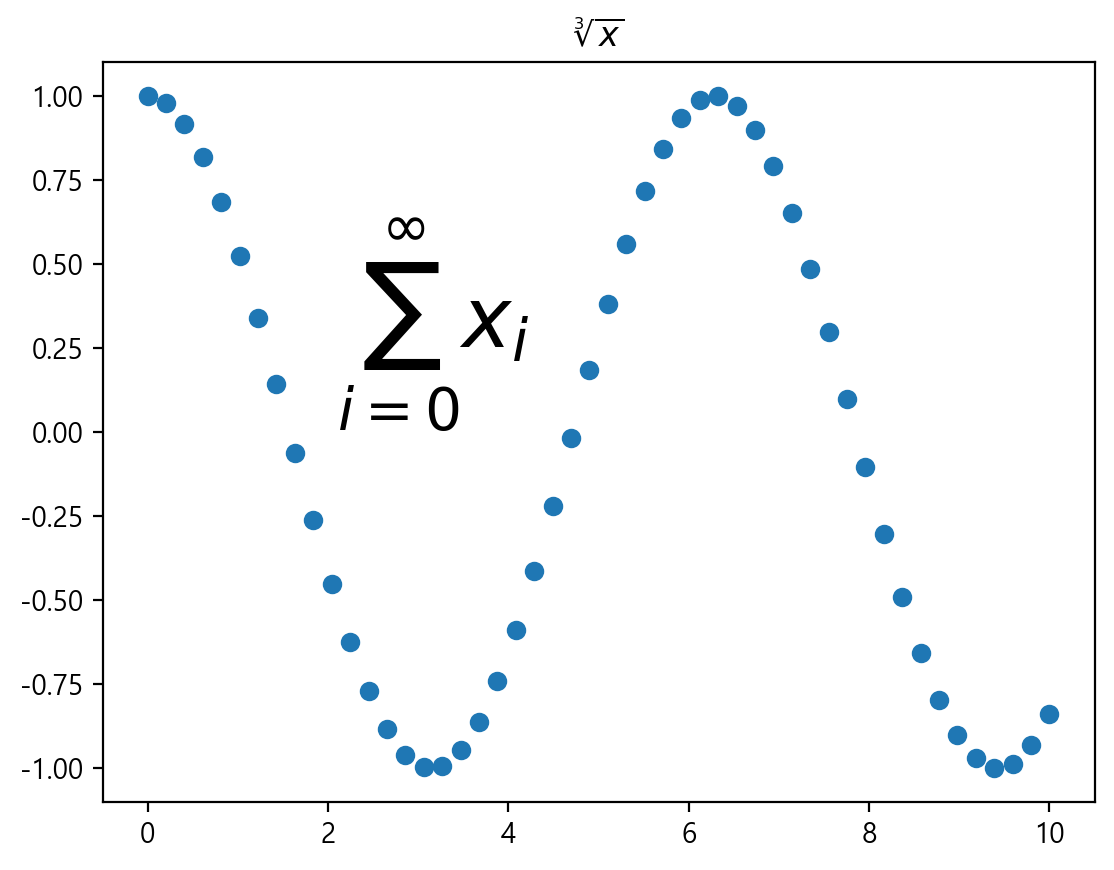

In [118]:
plt.scatter(x,y)
plt.text(2.1,0.25, r'$\sum_{i=0}^\infty x_i$', fontsize=30)
plt.title(r'$\sqrt[3]{x}$')
plt.show()

### 4) 축과 눈금

- 교안(33page) : https://matplotlib.org/3.1.0/api/axis_api.html

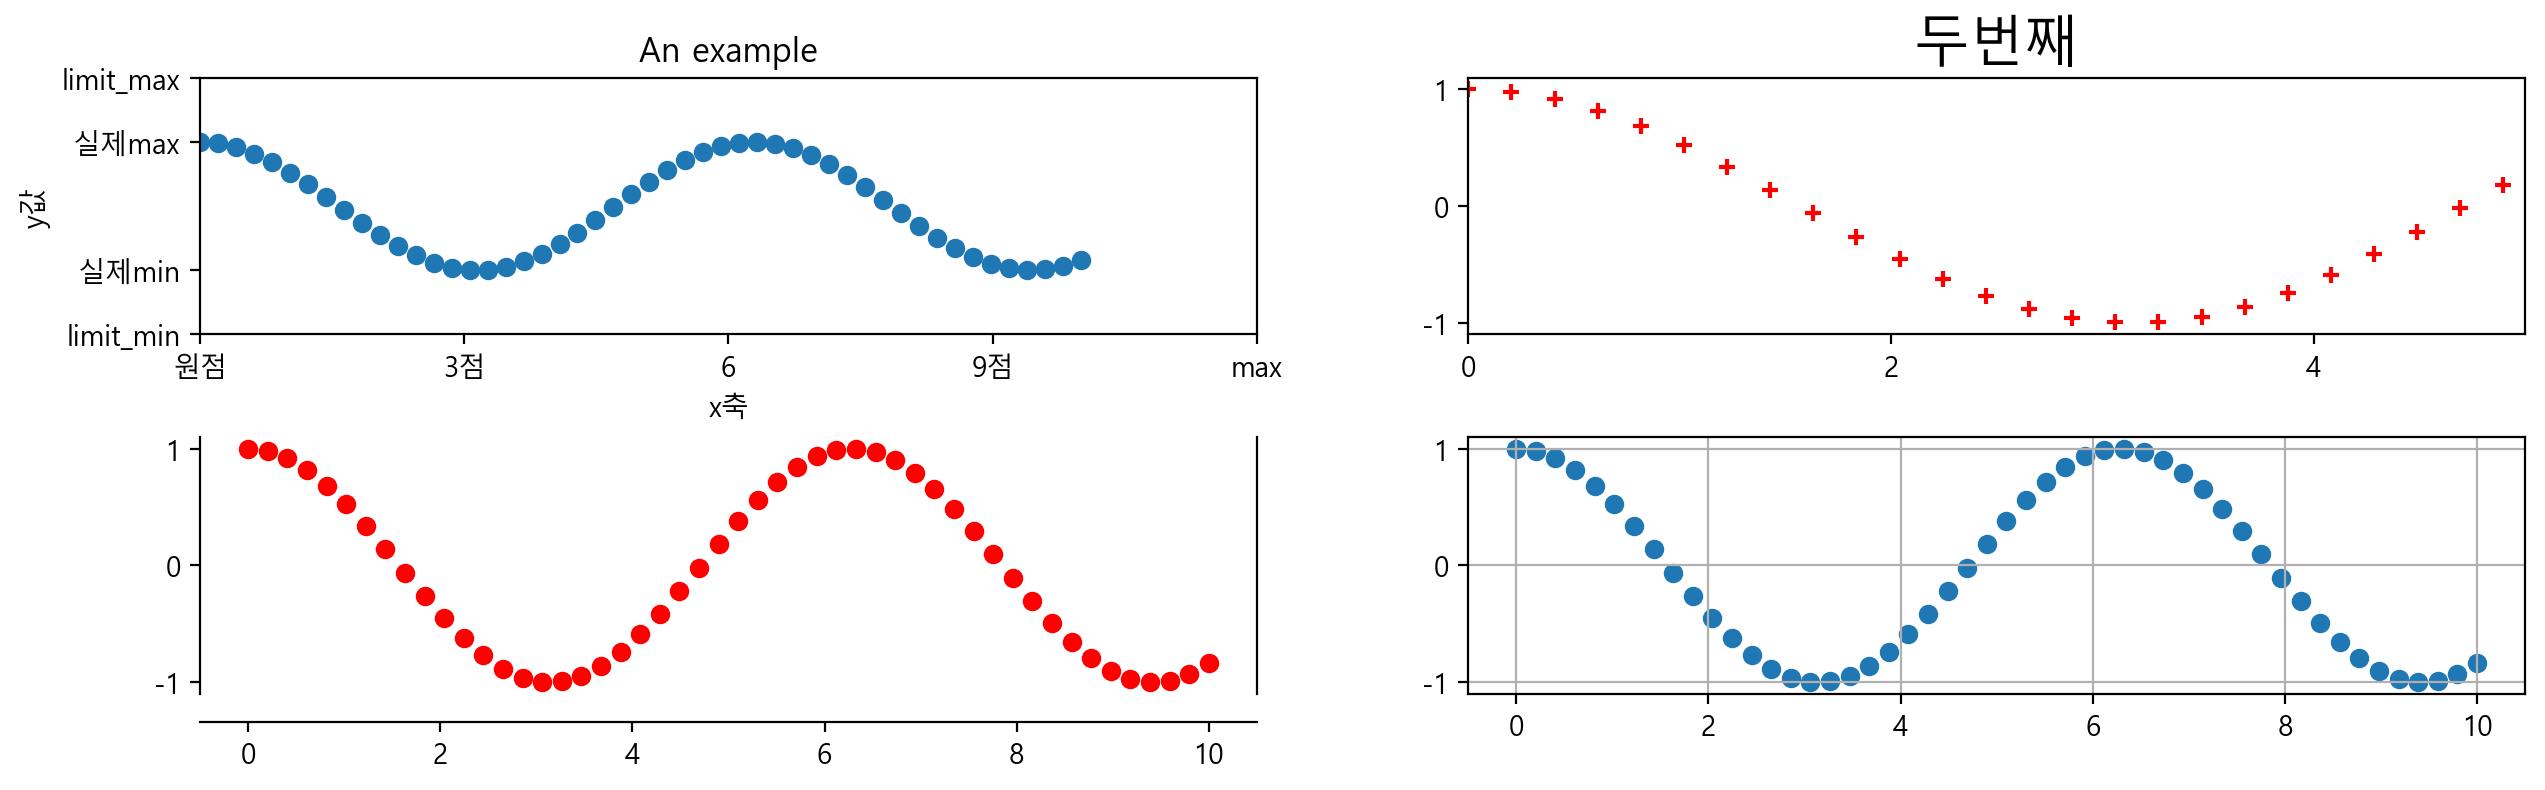

In [145]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,4))

# 서브플롯끼리 여백 조정(title, x축 label이 겹치는 것을 방지)
plt.subplots_adjust(hspace=0.4, # hspace : 위아래 여백조정. 1은 서브플롯 높이
                   wspace=0.2)  # wspace : 좌우 여백조정. 1은 서브플롯 너비

axes[0,0].scatter(x,y)
axes[0,0].set(title='An example', ylabel='y값', xlabel='x축',
             xlim = [0,12], # x축 눈금 범위
             xticks = [0,3,6,9,12], # x축 눈금
             xticklabels = ['원점','3점',6,'9점','max'], # x축 눈금 라벨(내부적으로는 12지만 화면에 표현은 max)
             ylim = [-2,2],
             yticks = [-2,-1,1,2],
             yticklabels = ['limit_min','실제min','실제max','limit_max']) 

axes[0,1].scatter(x,y, color='r', marker='+')
axes[0,1].set_title('두번째', fontsize=20) # 이렇게 따로 하나씩 하면 폰트랑 지정할 수 있음. 저기에 한번에 하면 폰트지정을 못함
axes[0,1].set_xlim([0,5])
axes[0,1].set_xticks(range(0,6,2))

axes[1,0].scatter(x,y, color='r')
axes[1,0].spines['top'].set_visible(False) 
axes[1,0].spines['bottom'].set_position(('outward',10)) # 10pt만큼 바깥쪽으로 이동

axes[1,1].scatter(x,y)
axes[1,1].grid(True)
plt.show()

### 5) 축공유 ★★

In [146]:
x = np.arange(0,10)
y1 = 0.5*x**2
y2 = -y1

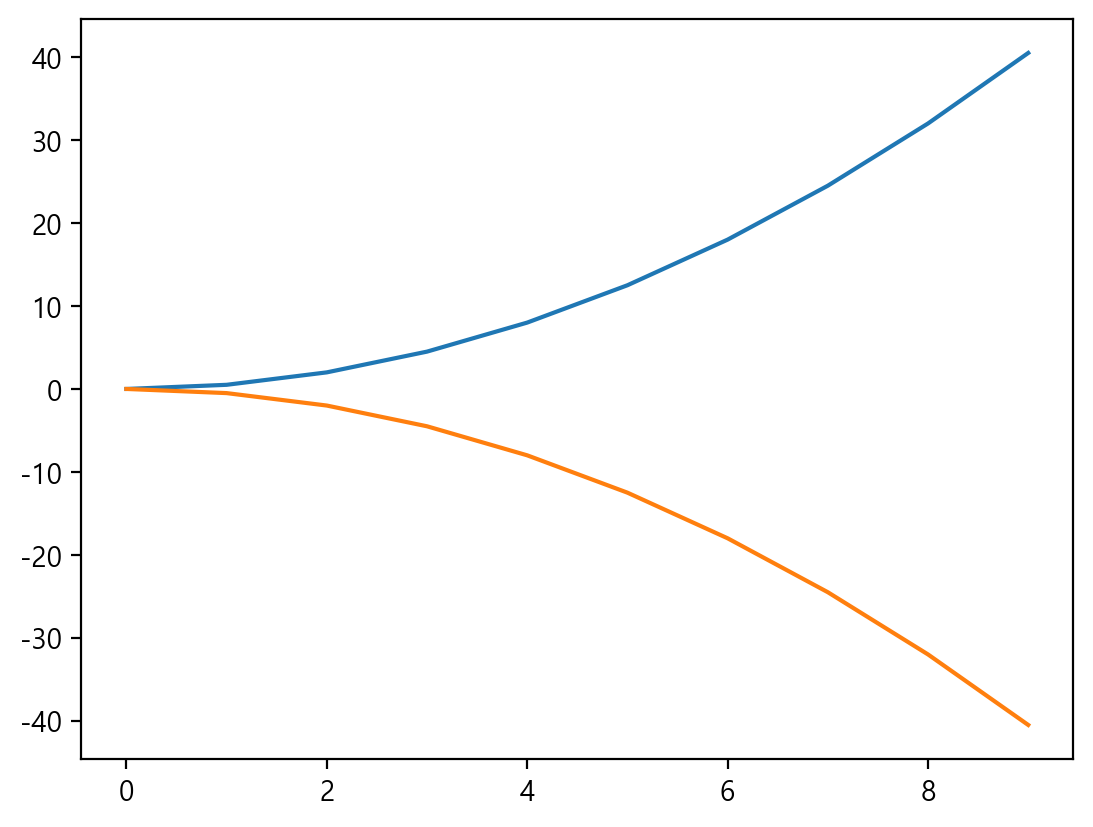

In [158]:
# 이렇게 하고싶은게 아님
plt.plot(x, y1)
plt.plot(x, y2)

plt.show()

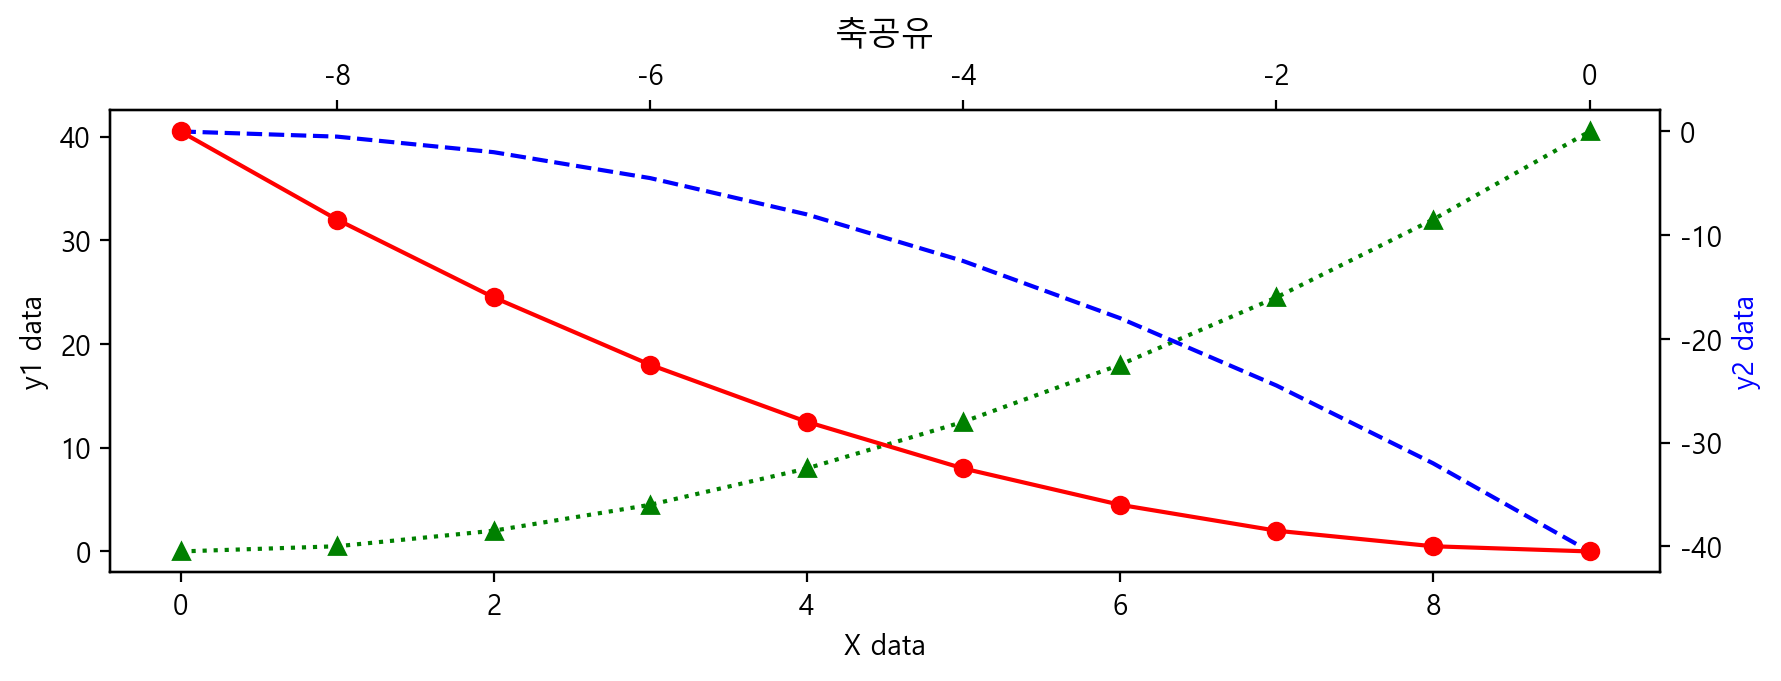

In [163]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x, y1, 'g^:')
ax1.set(title='축공유', xlabel='X data', ylabel='y1 data')

ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x, y2, 'b--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-')

plt.show()

### 6) 범례표시

### 7) 플롯 스타일 지정

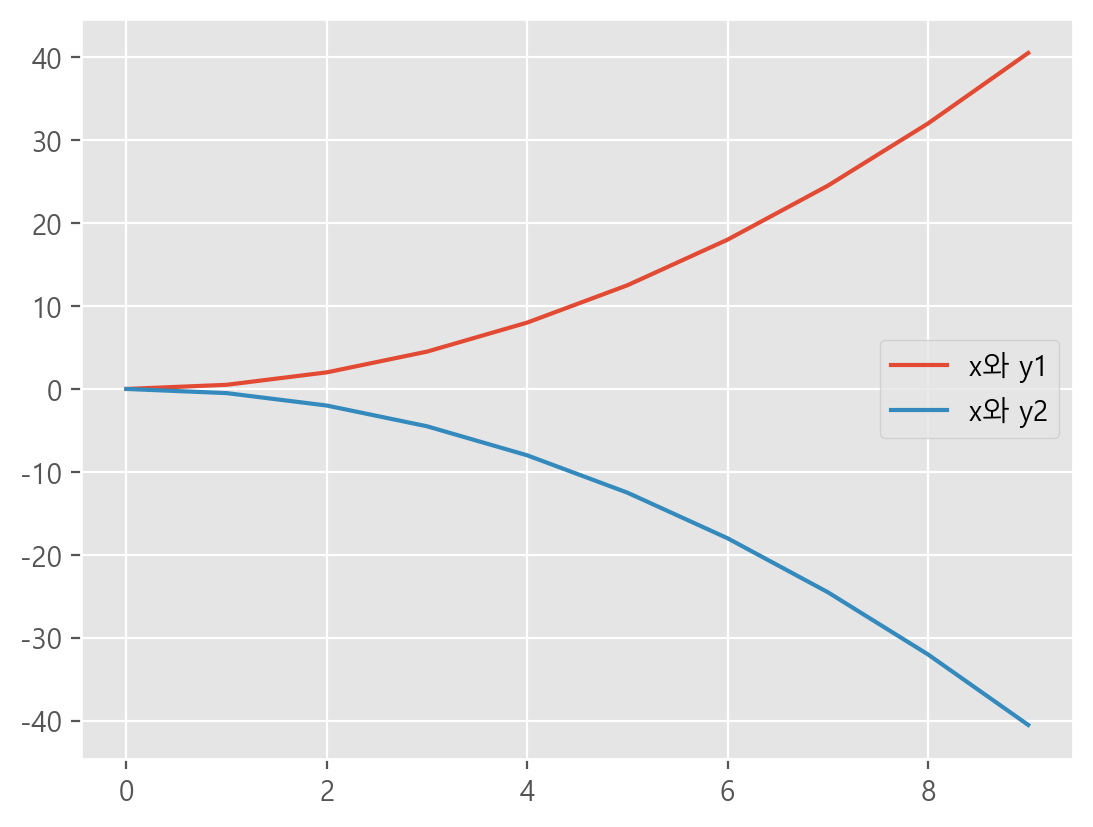

In [166]:
plt.style.use('ggplot') # default, ggplot, classic, ...
plt.plot(x, y1, label='x와 y1')
plt.plot(x, y2, label='x와 y2')
plt.legend(loc='center right')

plt.show()